In [6]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt


GRID_SIZE = 100
OBSTACLE_DENSITY = 0.2  # 20% of the grid cells are obstacles


REWARD_GOAL = 100
REWARD_OBSTACLE = -100
REWARD_STEP = -1


ACTIONS = ['up', 'down', 'left', 'right']
ACTION_TO_DELTA = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1),
}
 

In [7]:
   

def create_grid(grid_size, obstacle_density):
    grid = np.zeros((grid_size, grid_size))
    num_obstacles = int(grid_size * grid_size * obstacle_density)
    obstacles = random.sample(range(grid_size * grid_size), num_obstacles)
    for obs in obstacles:
        row, col = divmod(obs, grid_size)
        grid[row, col] = REWARD_OBSTACLE
    return grid


In [8]:

def generate_start_goal(grid):
    while True:
        start = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
        goal = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
        if start != goal and grid[start] != REWARD_OBSTACLE and grid[goal] != REWARD_OBSTACLE:
            grid[goal] = REWARD_GOAL
            return start, goal


In [9]:


class MDPEnvironment:
    def __init__(self, grid, goal):
        self.grid = grid
        self.goal = goal

    def get_next_state(self, state, action):
        if state == self.goal:
            return state, REWARD_GOAL

        row, col = state
        d_row, d_col = ACTION_TO_DELTA[action]
        next_state = (row + d_row, col + d_col)

        if 0 <= next_state[0] < GRID_SIZE and 0 <= next_state[1] < GRID_SIZE:
            if self.grid[next_state] != REWARD_OBSTACLE:
                return next_state, REWARD_STEP
        return state, REWARD_OBSTACLE

    def is_terminal(self, state):
        return state == self.goal


In [10]:


def value_iteration(env, gamma=0.9, theta=1e-4):
    V = np.zeros((GRID_SIZE, GRID_SIZE))
    policy = np.full((GRID_SIZE, GRID_SIZE), None)
    iterations = 0

    while True:
        delta = 0
        for row in range(GRID_SIZE):
            for col in range(GRID_SIZE):
                state = (row, col)
                if env.is_terminal(state) or env.grid[state] == REWARD_OBSTACLE:
                    continue
                v = V[state]
                max_value = float('-inf')
                best_action = None
                for action in ACTIONS:
                    next_state, reward = env.get_next_state(state, action)
                    value = reward + gamma * V[next_state]
                    if value > max_value:
                        max_value = value
                        best_action = action
                V[state] = max_value
                policy[state] = best_action
                delta = max(delta, abs(v - V[state]))
        iterations += 1
        if delta < theta:
            break
    return V, policy, iterations


In [11]:


def plot_grid_with_path(grid, start, goal, policy):
    path = []
    state = start
    while state != goal:
        path.append(state)
        action = policy[state]
        if action is None:
            break
        d_row, d_col = ACTION_TO_DELTA[action]
        state = (state[0] + d_row, state[1] + d_col)
    
    for row, col in path:
        grid[row, col] = 50 

    grid[goal] = REWARD_GOAL
    plt.imshow(grid, cmap='hot', interpolation='nearest')
    plt.title("Grid with Optimal Path")
    plt.show()


Start: (51, 19), Goal: (84, 46)
Iterations: 133
Time taken: 8.6242 seconds
Optimal Path:


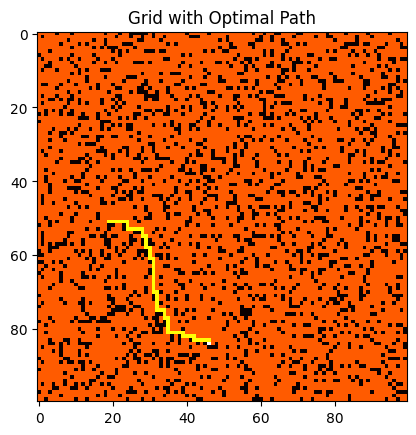

In [12]:


def main():
    grid = create_grid(GRID_SIZE, OBSTACLE_DENSITY)
    start, goal = generate_start_goal(grid)
    env = MDPEnvironment(grid, goal)

    # Start timing
    start_time = time.time()

    # Run Value Iteration
    V, policy, iterations = value_iteration(env)

    # End timing
    end_time = time.time()
    time_taken = end_time - start_time

    # Print results
    print(f"Start: {start}, Goal: {goal}")
    print(f"Iterations: {iterations}")
    print(f"Time taken: {time_taken:.4f} seconds")
    print("Optimal Path:")

    # Plot the grid with the path
    plot_grid_with_path(grid, start, goal, policy)


if __name__ == "__main__":
    main()
